In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
from scipy.stats import norm, uniform, expon
from scipy.integrate import quad
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
n = 5
m = 500
ran = np.array(norm.rvs(size=n*m))
sim = ran.reshape((n,m))

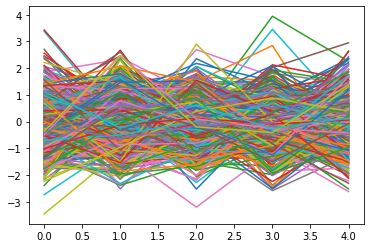

In [4]:
plt.plot(sim)
plt.show()

In [5]:
means = sim.mean(axis=0)
len(means)

500

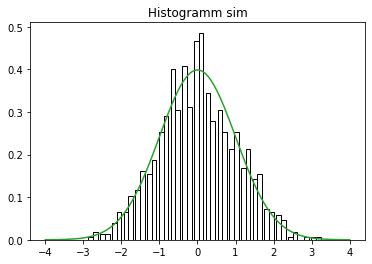

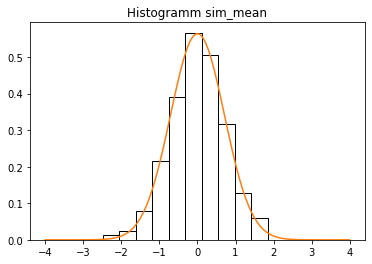

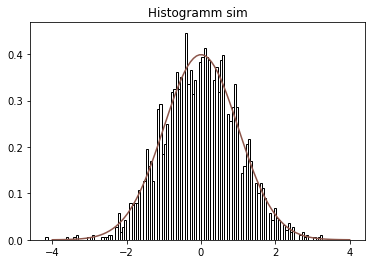

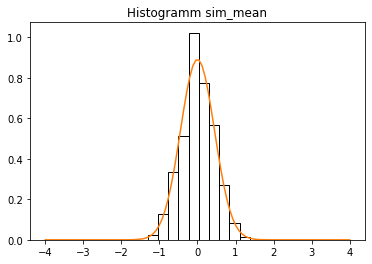

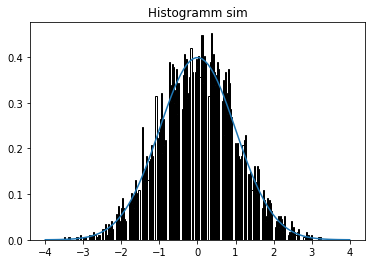

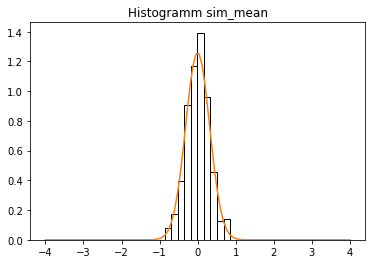

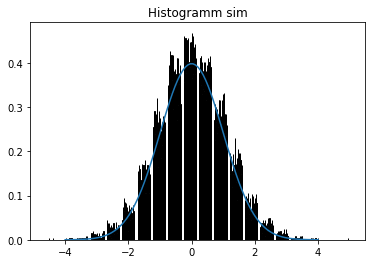

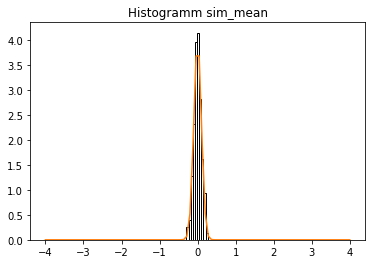

In [6]:
for n in np.array([2, 5, 10, 100]):
    m = 500
    ran = np.array(norm.rvs(size=n*m))
    sim = ran.reshape((n,m))
    means = sim.mean(axis=0)
    plt.hist(sim.T, bins=20, density=True, edgecolor="black",
    facecolor="white")
    x = np.linspace(-4, 4, num=100)
    y = norm.pdf(x)
    plt.plot(x,y)
    plt.title("Histogramm sim")
    plt.show()
    sim_mean = sim.mean(axis=0)
    plt.hist(sim_mean, density=True, edgecolor="black",
    facecolor="white")
    x = np.linspace(-4, 4, num=100)
    y = norm.pdf(x, loc=0, scale=1/np.sqrt(n))
    plt.plot(x,y)
    plt.title("Histogramm sim_mean")
    plt.show()

In [7]:
norm.cdf(x=95, loc=100, scale=10/np.sqrt(25))

0.006209665325776132

In [8]:
norm.cdf(x=2, loc=1, scale=2) - norm.cdf(x=0, loc=1, scale=2)

0.38292492254802624

In [9]:
norm.cdf(x=51, loc=50, scale=np.sqrt(200)) - norm.cdf(x=49, loc=50, scale=np.sqrt(200))

0.05637197779701664

In [10]:
norm.cdf(x=2, loc=1, scale=np.sqrt(4/50)) - norm.cdf(x=0, loc=1, scale=np.sqrt(4/50))

0.999593047982555

In [11]:
seriesa = Series([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])
seriesb = Series([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])

In [14]:
print(seriesa.mean())
print(seriesa.std()/np.sqrt(seriesa.size))
print(seriesb.mean())
print(seriesb.std()/np.sqrt(seriesb.size))

80.02076923076923
0.00664691353682878
79.97875
0.011090133968017208


In [15]:
print((seriesa.std()/np.sqrt(seriesa.size))/seriesa.mean())
print((seriesb.std()/np.sqrt(seriesb.size))/seriesb.mean())

8.30648542962636e-05
0.00013866350709428702


In [16]:
help(uniform.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



In [17]:
random = uniform.rvs(size=1000, loc=0, scale=1)

In [21]:
integral = norm.cdf(1)-norm.cdf(0)
integrand = np.exp(-np.square(x)/2)
print(integral)
print(integrand)

0.3413447460685429
[3.35462628e-04 4.61959816e-04 6.32016381e-04 8.59046258e-04
 1.16002900e-03 1.55627099e-03 2.07427188e-03 2.74669361e-03
 3.61342326e-03 4.72271279e-03 6.13236949e-03 7.91095973e-03
 1.01389764e-02 1.29099076e-02 1.63311300e-02 2.05245393e-02
 2.56268178e-02 3.17892311e-02 3.91768440e-02 4.79670435e-02
 5.83472693e-02 7.05118648e-02 8.46579886e-02 1.00980559e-01
 1.19666249e-01 1.40886593e-01 1.64790334e-01 1.91495195e-01
 2.21079315e-01 2.53572656e-01 2.88948742e-01 3.27117124e-01
 3.67916978e-01 4.11112291e-01 4.56389004e-01 5.03354510e-01
 5.51539774e-01 6.00404295e-01 6.49343988e-01 6.97701953e-01
 7.44781934e-01 7.89864161e-01 8.32223097e-01 8.71146510e-01
 9.05955191e-01 9.36022558e-01 9.60793360e-01 9.79800714e-01
 9.92680728e-01 9.99184090e-01 9.99184090e-01 9.92680728e-01
 9.79800714e-01 9.60793360e-01 9.36022558e-01 9.05955191e-01
 8.71146510e-01 8.32223097e-01 7.89864161e-01 7.44781934e-01
 6.97701953e-01 6.49343988e-01 6.00404295e-01 5.51539774e-01
 5.03